# 문제 정의와 데이터 수집

> 원래는 넷플릭스 영화 추천 알고리즘을 해보려고 하였으나, Kaggle을 뒤져보는 중 재미있는 dataset을 발견하여 애니메이션 추천 알고리즘을 만들어보기로 하였다. 또한 나중에 만들어 보고 싶은 AnimeGAN에 대한 선행학습이라 생각하고 진행해보기로 하였다.
#### dataset : https://www.kaggle.com/CooperUnion/anime-recommendations-database

### Cloumns Description (Anime.csv)
| Column | Description |
|:---:|:---:|
|Anime_id|애니메이션을 식별하는 myanimelist.net의 고유 ID입니다.|
|name|애니메이션의 전체 이름.|
|genre|이 애니메이션의 쉼표로 구분된 장르 목록입니다.|
|type|영화, TV, OVA 등|
|episodes|이 쇼의 에피소드 수입니다. (영화인 경우 1).|
|rating|이 애니메이션에 대한 10점 만점의 평균 등급입니다.|
|members|이 애니메이션의
"그룹" 에 있는 커뮤니티 회원 수입니다 .|

### Cloumns Description (Rating.csv)
| Column | Description |
|:---:|:---:|
|user_id|식별할 수 없는 무작위로 생성된 사용자 ID입니다.|
|anime_id|이 사용자가 평가한 애니메이션.|
|rating|이 사용자가 할당한 10점 만점의 등급입니다(사용자가 시청했지만 등급을 할당하지 않은 경우 -1).|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_anime = pd.read_csv("data/Anime.csv")
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df_rating = pd.read_csv("data/Rating.csv")
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [6]:
df_anime["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [7]:
df_anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

# 결측값 처리하기
- 위에서 확인한 결과 genre, type, rating에 각각 62, 25, 230개의 결측값이 있다는 것을 알 수 있다.
- 결측값이 있는 row가 적다고 생각하여 삭제하기로 결정했다.
- 하지만 rating은 중간값으로 채워주기로 하였다.

In [8]:
df_anime.dropna(subset=["genre", "type"], inplace=True)
df_anime.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      193
members       0
dtype: int64

In [9]:
# 중간값확인
df_anime["rating"].describe()

count    12017.000000
mean         6.478264
std          1.023857
min          1.670000
25%          5.890000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [10]:
# rating의 결측값 중간값으로 바꾸기
df_anime["rating"].fillna(6.57, inplace=True)
df_anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
# 마찬가지로 Rating.csv의 결측값 확인
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [12]:
# matplotlib에서는 한글이 깨진다는 문제가 발생하기 때문에 폰트설정을 해준다.
import matplotlib.font_manager as fm
font_path = r'D:/font/NanumBarunpenB.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

Text(0.5, 0, 'Anime_members')

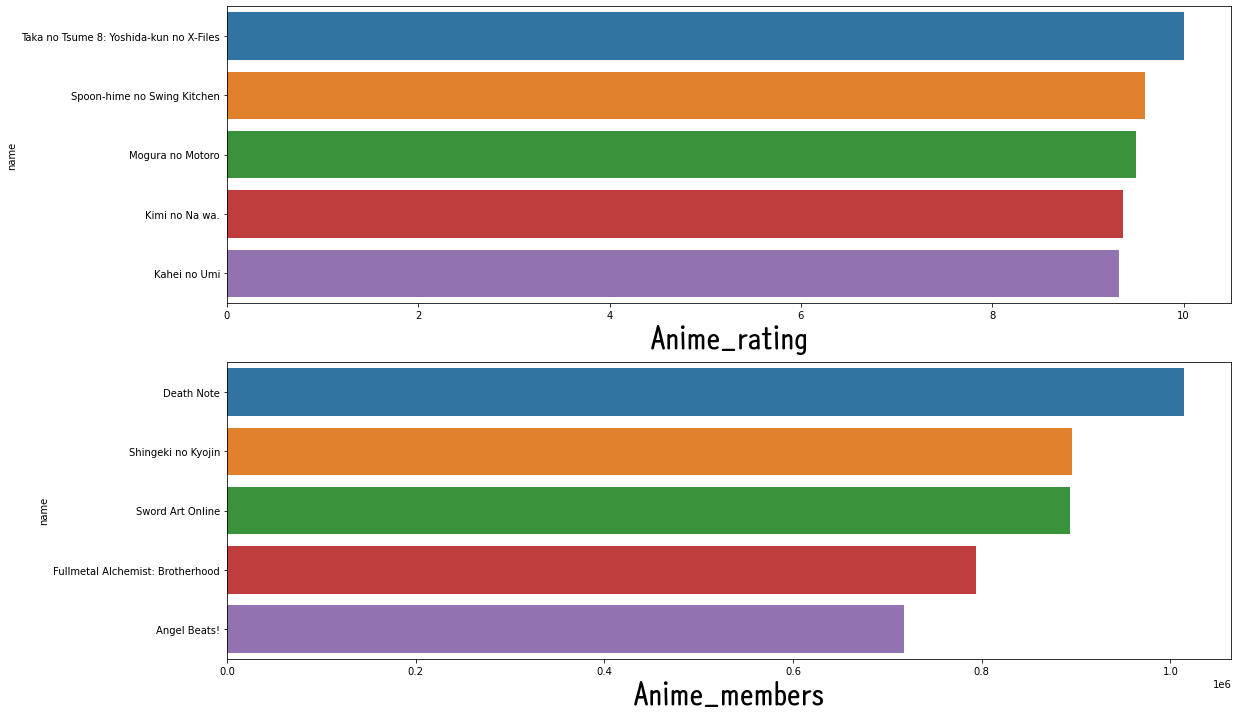

In [13]:
# Anime_rating, Anime_members로 보는 Anime 인기순위
figure, (ax1,ax2) = plt.subplots(nrows = 2, ncols =1 ) 
figure.set_size_inches(18,12) 
sns.barplot(data=df_anime.sort_values("rating", ascending=False)[:5], x="rating", y="name", ax=ax1) 
sns.barplot(data=df_anime.sort_values("members", ascending=False)[:5], x="members", y="name", ax=ax2) 
ax1.set_xlabel("Anime_rating", fontsize=30, fontproperties=fontprop) 
ax2.set_xlabel("Anime_members", fontsize=30, fontproperties=fontprop)

## Rating.csv data graph

In [14]:
# rating column의 값이 -1이면 user가 등급을 할당하지 않은 것이기 때문에 -1인 row는 삭제한다.
df_rating_drop = df_rating[df_rating["rating"]==-1].index
df_rating.drop(df_rating_drop, inplace = True)

In [15]:
# 잘 사라졌는지 확인
df_rating["rating"][df_rating["rating"]==-1].sum()

0

In [16]:
df_rating

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


### 각 user의 높은 rating을 받은 anime 추출
- rating이 10으로 중복일때는 마지막에 평가된 anime_id로 지정

In [17]:
# df_anime에 새 column인 vote_user 추가
df_anime["vote_user"] = 0
df_anime

,anime_id,name,genre,type,episodes,rating,members,vote_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0
12290,5543,Under World,Hentai,OVA,1,4.28,183,0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0


In [18]:
# for문으로 각 유저의 rating에 접근
b_rating_id = 0 # user_id에 따른 가장 높은 rating을 받은 anime_id

for i in range(1, 73516): # max user
    b_rating_id = df_rating["anime_id"][df_rating["user_id"]==i].max()
    df_anime["vote_user"][df_anime["anime_id"]==b_rating_id] = df_anime["vote_user"][df_anime["anime_id"]==b_rating_id] + 1

df_anime

<ipython-input-18-dedb81060706>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anime["vote_user"][df_anime["anime_id"]==b_rating_id] = df_anime["vote_user"][df_anime["anime_id"]==b_rating_id] + 1


,anime_id,name,genre,type,episodes,rating,members,vote_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,617
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,314
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,43
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,152
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,27
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0
12290,5543,Under World,Hentai,OVA,1,4.28,183,0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0


[Text(0.5, 1.0, '많은 유저들의 최고점을 받은 애니메이션')]

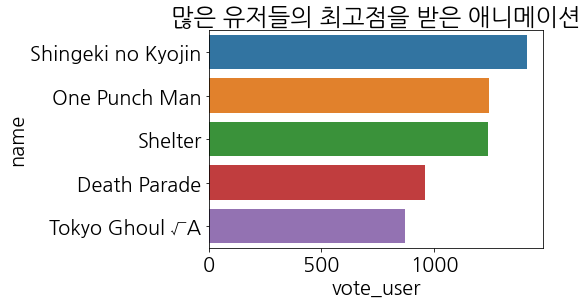

In [67]:
fig = sns.barplot(data=df_anime.sort_values("vote_user", ascending=False)[:5], x="vote_user", y="name")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 20
fig.set(title="많은 유저들의 최고점을 받은 애니메이션")

### 장르 분석을 하기위한 절차

In [21]:
df_anime["genre"].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

In [46]:
# genre column이 쉼표로 묶어져있어 묶어져 있는 값이 한개의 unique한 특성이 되어버린다..!

genre_unique = list(df_anime["genre"])

genre_unique = list(map(lambda genres : genres.split(','), genre_unique))

genre_unique = sum(genre_unique, []) # 2차원 -> 1차원

genre_unique = [genres.strip() for genres in genre_unique]

genre_unique = set(genre_unique)

genre_unique

{'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri'}

In [62]:
# 아..........
df_anime[df_anime["genre"].str.contains('Hentai')].sort_values("vote_user", ascending=False)

,anime_id,name,genre,type,episodes,rating,members,vote_user
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,23
12217,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,14
11168,32667,Baka na Imouto wo Rikou ni Suru no wa Ore no x...,Hentai,OVA,4,7.24,3965,9
11290,34107,Iizuka-senpai x Blazer: Ane Kyun! yori The Ani...,Hentai,OVA,1,6.87,920,7
11194,28961,Idol☆Sister,"Harem, Hentai",OVA,1,7.12,4286,7
...,...,...,...,...,...,...,...,...
11589,8292,Seitokaichou Hikaru,Hentai,OVA,1,6.39,2772,0
11590,2507,Tsuma Tsuma,Hentai,OVA,2,6.39,2208,0
11591,753,Chijoku Shinsatsushitsu,Hentai,OVA,2,6.38,2825,0
11592,3324,Discode: Ijou Seiai,Hentai,OVA,3,6.38,4289,0


In [63]:
df_anime[df_anime["genre"].str.contains('Romance')].sort_values("vote_user", ascending=False)

,anime_id,name,genre,type,episodes,rating,members,vote_user
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,712
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,617
897,32729,Orange,"Drama, Romance, School, Sci-Fi, Shoujo",TV,13,7.78,165358,456
262,23289,Gekkan Shoujo Nozaki-kun,"Comedy, Romance, School",TV,12,8.24,292622,351
2132,21881,Sword Art Online II,"Action, Adventure, Fantasy, Game, Romance",TV,24,7.35,537892,284
...,...,...,...,...,...,...,...,...
4117,1904,Harukanaru Toki no Naka de 2: Shiroki Ryuu no ...,"Demons, Fantasy, Historical, Magic, Romance, S...",OVA,3,6.80,2051,0
4132,12663,Patalliro! Stardust Keikaku,"Adventure, Comedy, Romance, Shoujo, Shounen Ai",Movie,1,6.80,373,0
4155,12279,Kinnikuman II Sei: Muscle Ninjin Soudatsu sen!...,"Action, Comedy, Drama, Martial Arts, Romance, ...",Movie,1,6.79,461,0
4162,626,Mamotte Shugogetten!,"Comedy, Fantasy, Magic, Romance, Shounen",TV,22,6.79,4995,0


[Text(0.5, 1.0, '로맨스 부문 top 10')]

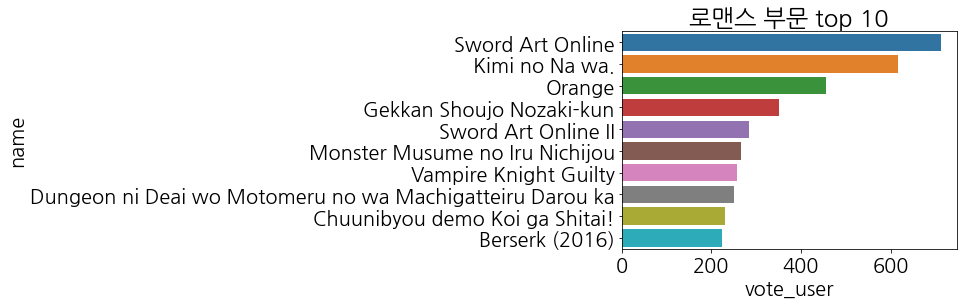

In [66]:
fig = sns.barplot(data=df_anime[df_anime["genre"].str.contains('Romance')].sort_values("vote_user", ascending=False)[:10], x="vote_user", y="name")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 20
fig.set(title="로맨스 부문 top 10")

[Text(0.5, 1.0, '액션 부문 top 10')]

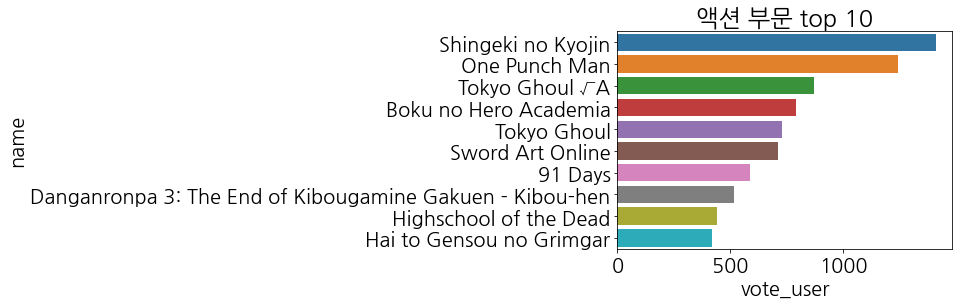

In [68]:
fig = sns.barplot(data=df_anime[df_anime["genre"].str.contains('Action')].sort_values("vote_user", ascending=False)[:10], x="vote_user", y="name")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 20
fig.set(title="액션 부문 top 10")

[Text(0.5, 1.0, '판타지 부문 top 10')]

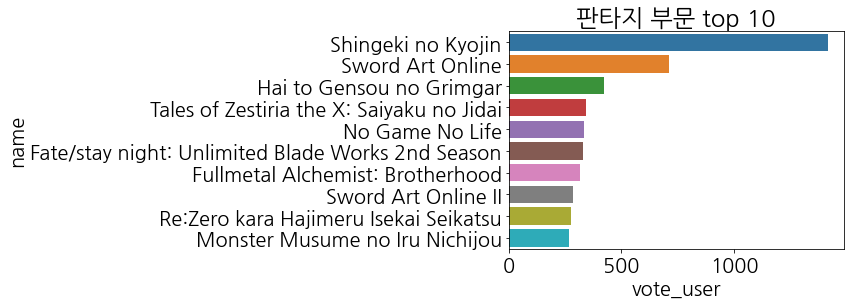

In [69]:
fig = sns.barplot(data=df_anime[df_anime["genre"].str.contains('Fantasy')].sort_values("vote_user", ascending=False)[:10], x="vote_user", y="name")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 20
fig.set(title="판타지 부문 top 10")